In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast
%matplotlib inline
import tensorflow as tf


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Model, Sequential


from keras.layers import Dense, Activation, Convolution1D,Conv1D, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout,Input
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
data = pd.read_csv(os.path.join("datasets","ptb-xl-a-comprehensive-electrocardiographic-feature-dataset-1.0.1","features","12sl_features.csv"))

In [19]:
data

,P_Area_I,P_PeakTime_I,Q_Area_I,Q_PeakTime_I,R_Area_I,R_PeakTime_I,S_Area_I,S_PeakTime_I,QRS_Balance_I,T_Area_I,...,T+_Dur_aVF,T-_Dur_aVF,T+_Amp_aVF,T-_Amp_aVF,T_Morph_aVF,T_DurFull_aVF,P_Dur_Global,P_Found_Global,HR__Global,P_Term_V1
0,0.264,64.0,0.000,0.0,0.737,30.0,0.000,0.0,629.0,0.819,...,208.0,0.0,0.151,0.000,1,208.0,112.0,1,64.0,0.000
1,-0.047,6.0,0.015,8.0,0.794,36.0,1.246,76.0,205.0,2.206,...,0.0,127.0,0.000,-0.078,-1,127.0,66.0,1,75.0,0.000
2,0.000,0.0,0.000,0.0,0.792,38.0,1.389,74.0,141.0,1.155,...,0.0,66.0,0.000,-0.078,-1,66.0,NaN,0,169.0,0.000
3,0.196,74.0,0.000,0.0,0.947,56.0,0.000,0.0,439.0,-0.339,...,0.0,0.0,0.000,0.000,-1,0.0,114.0,1,79.0,0.000
4,0.287,102.0,0.000,0.0,1.021,36.0,0.000,0.0,937.0,0.756,...,104.0,66.0,39.000,-0.034,-2,170.0,136.0,1,92.0,6.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21794,0.220,80.0,0.015,10.0,0.961,38.0,0.000,0.0,620.0,0.852,...,208.0,0.0,0.175,0.000,1,208.0,120.0,1,67.0,0.000
21795,0.224,78.0,0.012,6.0,1.022,34.0,0.000,0.0,693.0,0.734,...,167.0,0.0,0.092,0.000,1,167.0,140.0,1,59.0,2.465
21796,0.206,62.0,0.000,0.0,0.789,34.0,0.000,0.0,722.0,0.657,...,182.0,0.0,0.312,0.000,1,182.0,110.0,1,70.0,2.418
21797,0.119,48.0,0.000,0.0,0.961,36.0,0.000,0.0,937.0,1.200,...,180.0,0.0,0.087,0.000,1,180.0,142.0,1,59.0,5.840


In [20]:
data.head()

,P_Area_I,P_PeakTime_I,Q_Area_I,Q_PeakTime_I,R_Area_I,R_PeakTime_I,S_Area_I,S_PeakTime_I,QRS_Balance_I,T_Area_I,...,T+_Dur_aVF,T-_Dur_aVF,T+_Amp_aVF,T-_Amp_aVF,T_Morph_aVF,T_DurFull_aVF,P_Dur_Global,P_Found_Global,HR__Global,P_Term_V1
0,0.264,64.0,0.000,0.0,0.737,30.0,0.000,0.0,629.0,0.819,...,208.0,0.0,0.151,0.000,1,208.0,112.0,1,64.0,0.000
1,-0.047,6.0,0.015,8.0,0.794,36.0,1.246,76.0,205.0,2.206,...,0.0,127.0,0.000,-0.078,-1,127.0,66.0,1,75.0,0.000
2,0.000,0.0,0.000,0.0,0.792,38.0,1.389,74.0,141.0,1.155,...,0.0,66.0,0.000,-0.078,-1,66.0,NaN,0,169.0,0.000
3,0.196,74.0,0.000,0.0,0.947,56.0,0.000,0.0,439.0,-0.339,...,0.0,0.0,0.000,0.000,-1,0.0,114.0,1,79.0,0.000
4,0.287,102.0,0.000,0.0,1.021,36.0,0.000,0.0,937.0,0.756,...,104.0,66.0,39.000,-0.034,-2,170.0,136.0,1,92.0,6.612


In [21]:
data.columns

Index(['P_Area_I', 'P_PeakTime_I', 'Q_Area_I', 'Q_PeakTime_I', 'R_Area_I',
       'R_PeakTime_I', 'S_Area_I', 'S_PeakTime_I', 'QRS_Balance_I', 'T_Area_I',
       ...
       'T+_Dur_aVF', 'T-_Dur_aVF', 'T+_Amp_aVF', 'T-_Amp_aVF', 'T_Morph_aVF',
       'T_DurFull_aVF', 'P_Dur_Global', 'P_Found_Global', 'HR__Global',
       'P_Term_V1'],
      dtype='object', length=783)

In [22]:
data.shape

(21799, 783)

In [23]:
desc = pd.read_csv(os.path.join("datasets","ptb-xl-a-comprehensive-electrocardiographic-feature-dataset-1.0.1","labels","12sl_statements.csv"))

In [24]:
desc.head()

,ecg_id,statements,statements_cat,statements_ext,statements_ext_snomed
0,1,"['NSR', 'NML']","['NSR', 'NML']","[('NSR', 100.0), ('NML', 100.0)]","[(441840, 100.0), (4008453, 100.0), (4010019, ..."
1,21803,"['SRTH', 'MSAR', 'RBBB', 'IT', 'AB']","['SRTH;MSAR', 'RBBB', 'IT', 'AB']","[('SRTH', 100.0), ('MSAR', 100.0), ('RBBB', 10...","[(134057, 100.0), (313791, 100.0), (314059, 10..."
2,21804,"['AFIB', 'RVR', 'RBBB', 'IT', 'AB']","['AFIB;RVR', 'RBBB', 'IT', 'AB']","[('AFIB', 100.0), ('RVR', 100.0), ('RBBB', 100...","[(134057, 100.0), (313217, 100.0), (313791, 10..."
3,21805,"['NSR', 'LAD3', 'ASMI', 'AU', 'ST&', 'LT', 'AB']","['NSR', 'LAD3', 'ASMI;AU', 'ST&;LT', 'AB']","[('NSR', 100.0), ('LAD3', 100.0), ('ASMI;AU', ...","[(134057, 100.0), (314666, 100.0), (320536, 10..."
4,21806,"['NSR', 'NST', 'AB']","['NSR', 'NST', 'AB']","[('NSR', 100.0), ('NST', 100.0), ('AB', 100.0)]","[(320536, 100.0), (441840, 100.0), (4008453, 1..."


In [25]:
desc.shape

(21799, 5)

In [26]:
desc['statements'].unique()

array(["['NSR', 'NML']", "['SRTH', 'MSAR', 'RBBB', 'IT', 'AB']",
       "['AFIB', 'RVR', 'RBBB', 'IT', 'AB']", ...,
       "['SRTH', 'FREQ', 'PVC', 'ILBBB', 'ST&', 'ALT', 'LNGQT', 'AB']",
       "['ACCEL', 'JUNCT-R', 'OCC', 'PVC', 'ILBBB', 'ST&', 'ALT', 'LNGQT', 'AB']",
       "['STACH', 'OCC', 'PVC', 'ST&', 'LT', 'AB']"], dtype=object)

In [27]:
desc['statements']

0                                          ['NSR', 'NML']
1                    ['SRTH', 'MSAR', 'RBBB', 'IT', 'AB']
2                     ['AFIB', 'RVR', 'RBBB', 'IT', 'AB']
3        ['NSR', 'LAD3', 'ASMI', 'AU', 'ST&', 'LT', 'AB']
4                                    ['NSR', 'NST', 'AB']
                               ...                       
21794                                      ['NSR', 'NML']
21795                               ['SBRAD', 'AT', 'AB']
21796                   ['SRTH', '$SWITH', 'PSVC', 'ABR']
21797                                    ['SBRAD', 'ABR']
21798                             ['SBRAD', 'RBBB', 'AB']
Name: statements, Length: 21799, dtype: object

In [28]:
diseases = [ast.literal_eval(s) for s in desc['statements']]
diseases

[['NSR', 'NML'],
 ['SRTH', 'MSAR', 'RBBB', 'IT', 'AB'],
 ['AFIB', 'RVR', 'RBBB', 'IT', 'AB'],
 ['NSR', 'LAD3', 'ASMI', 'AU', 'ST&', 'LT', 'AB'],
 ['NSR', 'NST', 'AB'],
 ['NSR', 'NML'],
 ['NSR', 'NML'],
 ['NSR', 'IMI', 'AU', 'AB'],
 ['NSR', 'NML'],
 ['NSR', 'NML'],
 ['SRTH', 'FAV', 'RBBB', 'AFB', 'BIFB', 'AB'],
 ['SBRAD', 'QRSV', 'LPAREN', 'SOKOLYON', 'RPAREN', 'BORDE'],
 ['NSR', 'NML'],
 ['SRTH',
  '$SWITH',
  'PAC',
  '$SWITH',
  '$SABCOND',
  'RAD',
  'QRSV',
  'LPAREN',
  'CORNPROD',
  'RPAREN',
  'BORDE'],
 ['NSR', 'NML'],
 ['NSR', 'NML'],
 ['NSR', 'LVH3', 'LPAREN', 'RAVL', 'COMMA', 'CORNPROD', 'RPAREN', 'NST', 'AB'],
 ['NSR', 'QRSV', 'LPAREN', 'CORNPROD', 'RPAREN', 'IMI', 'AU', 'AB'],
 ['NSR', 'NML'],
 ['NSR', 'NML'],
 ['SRTH', 'SAR', 'FAV', 'AFB', 'IMI', 'AU', 'CRO', 'ASMI', 'AU', 'AB'],
 ['NSR', 'NML'],
 ['NSR', 'SAR', 'NML'],
 ['NSR', 'SAR', 'NML'],
 ['SBRAD', 'SPR', 'ABR'],
 ['NSR', 'NML'],
 ['NSR', 'SAR', 'NML'],
 ['NSR', 'SAR', 'NML'],
 ['NSR', 'RAD', 'BORDE'],
 ['FLUT', 'VA

In [3]:
#finding the unique diseases from the target list
from pprint import pprint
unique_values = set()
for el in diseases:
    unique_values.update(el)
pprint ("total unique values: {} {}".format(len(unique_values) ,unique_values))


NameError: name 'diseases' is not defined

In [30]:
main_classes = ['NORM','STTC','MI','CD','HYP']   
target_classes = ['IPMI','SMI','IT','NSTT','JST','POSTMI','IVCD','STEMI','QRST','IMI','MIT','MILT']

In [31]:
print(len(main_classes))
print(len(data))
SIZE = len(data)

5
21799


In [32]:
def makeTargetLabelIndex(diseases,required,SIZE):
    ans = []
    for i in range(0,SIZE):
        for elm in diseases[i]:
            if elm in required:
                ans.append(i)
    return ans

In [33]:
target_index= makeTargetLabelIndex(diseases=diseases, required=target_classes ,SIZE=SIZE)
print(f'There are total {len(target_index)} heart disease patients and {SIZE - len(target_index)} healthy patients')

There are total 4751 heart disease patients and 17048 healthy patients


In [34]:
def CreateTargetLabels(indexes,size):
    labels = [0]*size
    for el in indexes:
        labels[el] = 1
    return labels
    

In [35]:
labels = CreateTargetLabels(target_index,SIZE)

In [36]:
df = data.copy()
df['target'] = labels

In [37]:
df.head()

,P_Area_I,P_PeakTime_I,Q_Area_I,Q_PeakTime_I,R_Area_I,R_PeakTime_I,S_Area_I,S_PeakTime_I,QRS_Balance_I,T_Area_I,...,T-_Dur_aVF,T+_Amp_aVF,T-_Amp_aVF,T_Morph_aVF,T_DurFull_aVF,P_Dur_Global,P_Found_Global,HR__Global,P_Term_V1,target
0,0.264,64.0,0.000,0.0,0.737,30.0,0.000,0.0,629.0,0.819,...,0.0,0.151,0.000,1,208.0,112.0,1,64.0,0.000,0
1,-0.047,6.0,0.015,8.0,0.794,36.0,1.246,76.0,205.0,2.206,...,127.0,0.000,-0.078,-1,127.0,66.0,1,75.0,0.000,1
2,0.000,0.0,0.000,0.0,0.792,38.0,1.389,74.0,141.0,1.155,...,66.0,0.000,-0.078,-1,66.0,NaN,0,169.0,0.000,1
3,0.196,74.0,0.000,0.0,0.947,56.0,0.000,0.0,439.0,-0.339,...,0.0,0.000,0.000,-1,0.0,114.0,1,79.0,0.000,0
4,0.287,102.0,0.000,0.0,1.021,36.0,0.000,0.0,937.0,0.756,...,66.0,39.000,-0.034,-2,170.0,136.0,1,92.0,6.612,0


In [44]:
df_cleaned = df.dropna()

In [45]:
X = df_cleaned.drop('target',axis=1)
y = df_cleaned['target']



In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X contains your features and y contains your target variable
selector = SelectKBest(score_func=f_classif, k=50)  # Select top 50 features
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_features_indices = selector.get_support(indices=True)

# Subset the original DataFrame with the selected features
X_selected = X.iloc[:, selected_features_indices]


In [50]:
X_selected.shape

(19545, 50)

In [53]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_selected)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.2,random_state=42)

In [55]:
model = Sequential([
    Dense(50, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),  # Adding dropout to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary crossentropy loss for binary classification
              metrics=['accuracy'])
model.summary()

#Train the model
#history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
#test_loss, test_acc = model.evaluate(x_test, y_test)
#print('Test accuracy:', test_acc)




C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,399 (67.96 KB)

 Trainable params: 17,399 (67.96 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the input shape
input_shape = (50, 1)

# Create the model
model = Sequential()
model.add(Input(shape=input_shape))
# Add three 1D convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
# Add the output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 48, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 22, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 9, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 4, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,321 (282.50 KB)

 Trainable params: 72,321 (282.50 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
#ignore
def preprocess(data,target):
    diseases = [ast.literal_eval(s) for s in target['statements']]
    main_classes = ['NORM','STTC','MI','CD','HYP']   
    target_classes = ['IPMI','SMI','IT','NSTT','JST','POSTMI','IVCD','STEMI','QRST','IMI','MIT','MILT']
    target_index= makeTargetLabelIndex(diseases=diseases, required=target_classes ,SIZE=SIZE)
    size = len(data)
    labels = CreateTargetLabels(target_index,size)
    df = data.copy()
    df['target'] = labels
   
    X = df.drop('target',axis=1)
    y = df['target']
    scaler = StandardScaler()
    X_norm = scaler.fit_transform(X)
    return X_norm,y


In [63]:
history = model.fit(x_train, y_train, epochs=2, batch_size=32, )

Epoch 1/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8781 - loss: 0.3041 - val_accuracy: 0.8958 - val_loss: 0.2645
Epoch 2/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8861 - loss: 0.2949 - val_accuracy: 0.8958 - val_loss: 0.2607


In [58]:
feature_model = Model(inputs=model.inputs, outputs = model.layers[-2].output)
feature_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,334 (67.71 KB)

 Trainable params: 17,334 (67.71 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
feature_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
features = feature_model.predict(x_train,verbose=True)


489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
print(features[0])

[0.11303165 0.10920054 0.09183595 0.         0.0940171  0.
 0.         0.08731934 0.12018614 0.         0.08601863 0.
 0.11569297 0.         0.         0.         0.         0.08669434
 0.1177539  0.10749185 0.         0.         0.09571386 0.09076776
 0.         0.09358545 0.         0.         0.         0.
 0.         0.         0.09114417 0.         0.         0.0884412
 0.10370328 0.09517767 0.         0.08640652 0.09651234 0.09448349
 0.         0.         0.         0.         0.09144393 0.
 0.09412719 0.         0.         0.         0.         0.
 0.09314721 0.         0.10961485 0.         0.         0.09071173
 0.         0.09215674 0.         0.09060604 0.         0.09471522
 0.08754571 0.08864427 0.08697645 0.08969076 0.09333717 0.09038006
 0.08791809 0.0958766  0.         0.         0.         0.
 0.         0.         0.08916742 0.         0.09326167 0.
 0.08755132 0.         0.         0.         0.08685107 0.08820629
 0.         0.09772982 0.         0.08990231 0.     

In [60]:

# Evaluate the model on the test set
loss, acc = model.evaluate(x_test, y_test)
print('Test accuracy:', acc)


123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.8848 - loss: 0.3080
Test accuracy: 0.8807879090309143


In [61]:
from keras.models import load_model
feature_model.save("ecg_feature_model.h5")


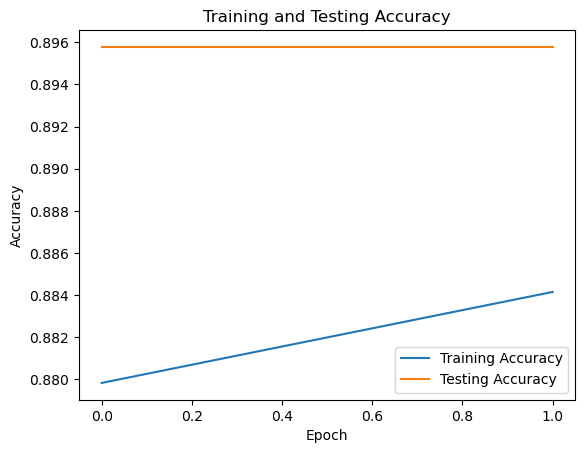

In [64]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()


In [39]:
new = load_model('ecg_feature_model.h5')

In [42]:
res = new.predict(x_test)

137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [43]:
res.shape

(4360, 128)